In [1]:
# For analysis and numerical functions
import pandas as pd
import numpy as np

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings(action='ignore')

# For modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

## Dataset Loading

In [2]:
df=pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Sanity Checks

In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Missing Value Check

In [5]:
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

## Pre Processing Steps

### Dropping unnecessary columns

In [6]:
df1=df.drop(['instant','dteday','casual', 'registered'], axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
df1.shape

(730, 12)

### From data we can see that 'season','yr','mnth','holiday','weekday','workingday','weathersit' all are categorical variables.
### We will replace 'season','weekday' and weathersit with appropriate values.

In [8]:
# Mapping season column
df1['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)

In [9]:
# Mapping mnth column
df1['mnth'].replace({1:"January",2:"Feburary",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",
                    9:"September",10:"October",11:"November",12:"December"},inplace=True)

In [10]:
# Mapping weekday column
df1['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

In [11]:
# Mapping weathersit column
df1['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",
                          4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)

In [12]:
# check the head of the dataset after mapping the categorical columns
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


## Exploratory Data Analysis

In [13]:
df1.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [14]:
cat_cols=['season','yr','mnth','holiday','weekday','workingday','weathersit']
cont_cols=['temp','atemp','hum','windspeed']
target=['cnt']
len(cat_cols)+len(cont_cols)+len(target)

12

## Univariate Analysis

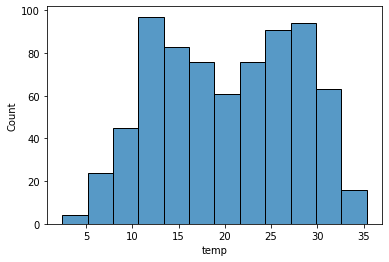

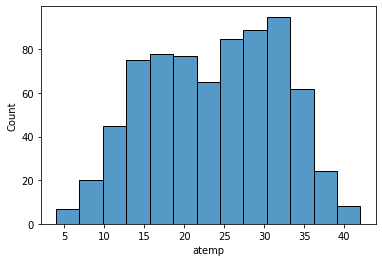

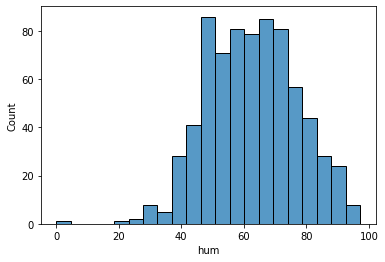

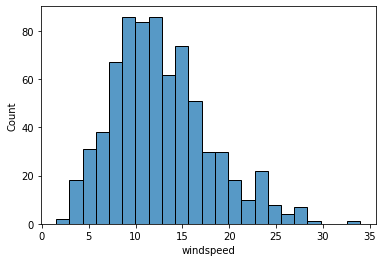

In [15]:
for i in cont_cols:
    sns.histplot(df1[i])
    plt.show()

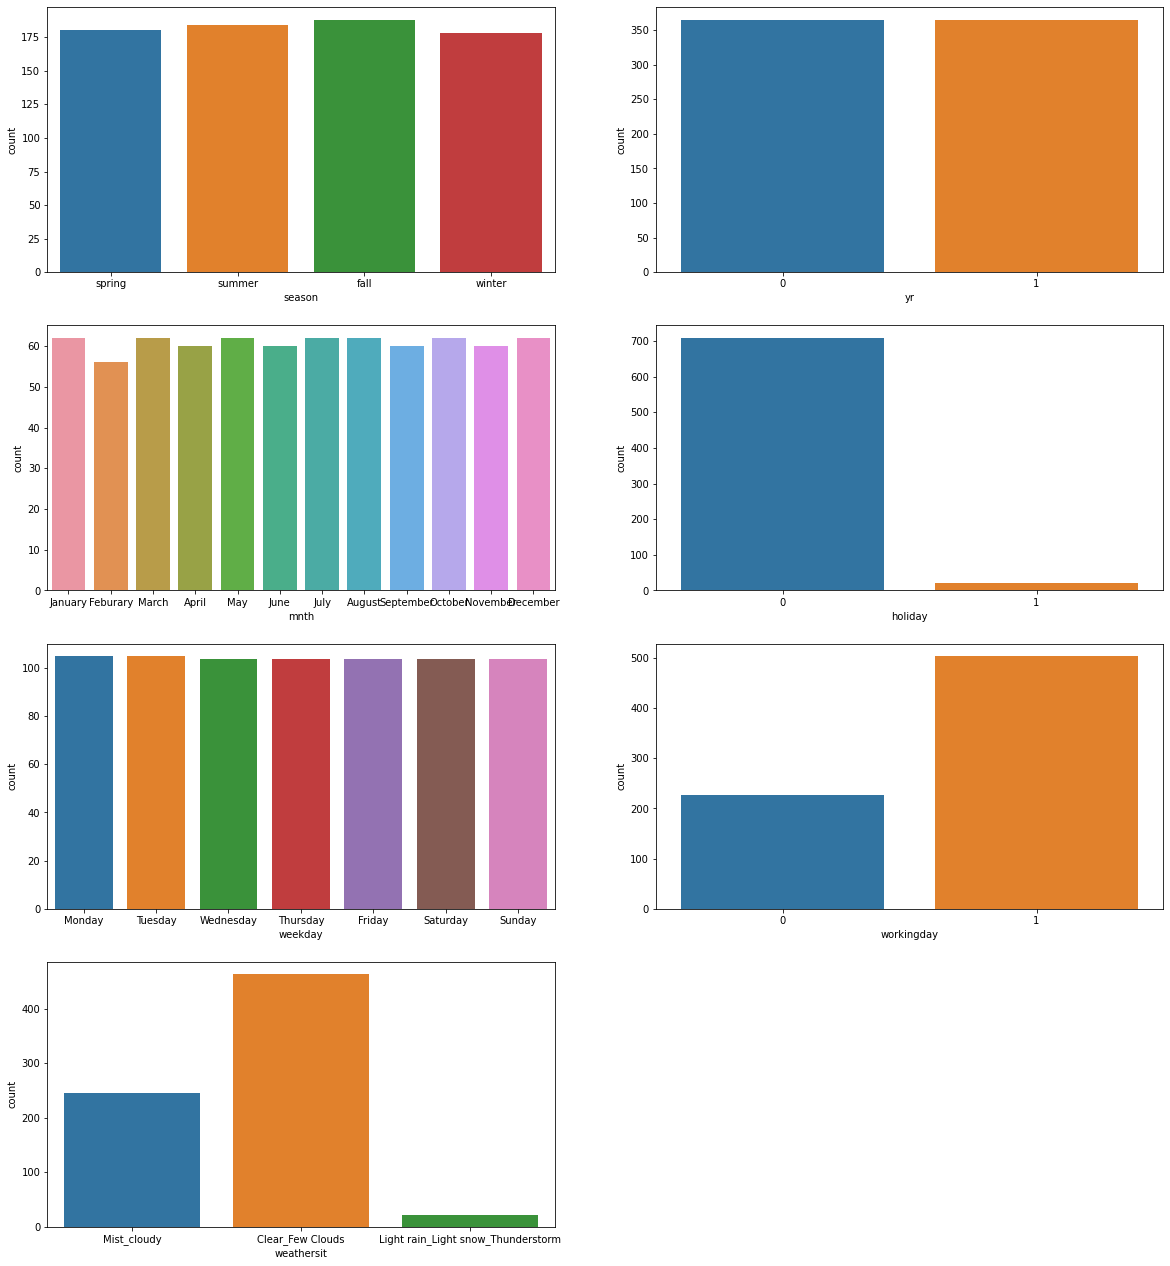

In [16]:
plt.figure(figsize = (20,40))
i = 1
for col in cat_cols:
    plt.subplot(7,2,i)
    sns.countplot(x = col , data = df1)
    i += 1
plt.show()

## Bivariate Analysis

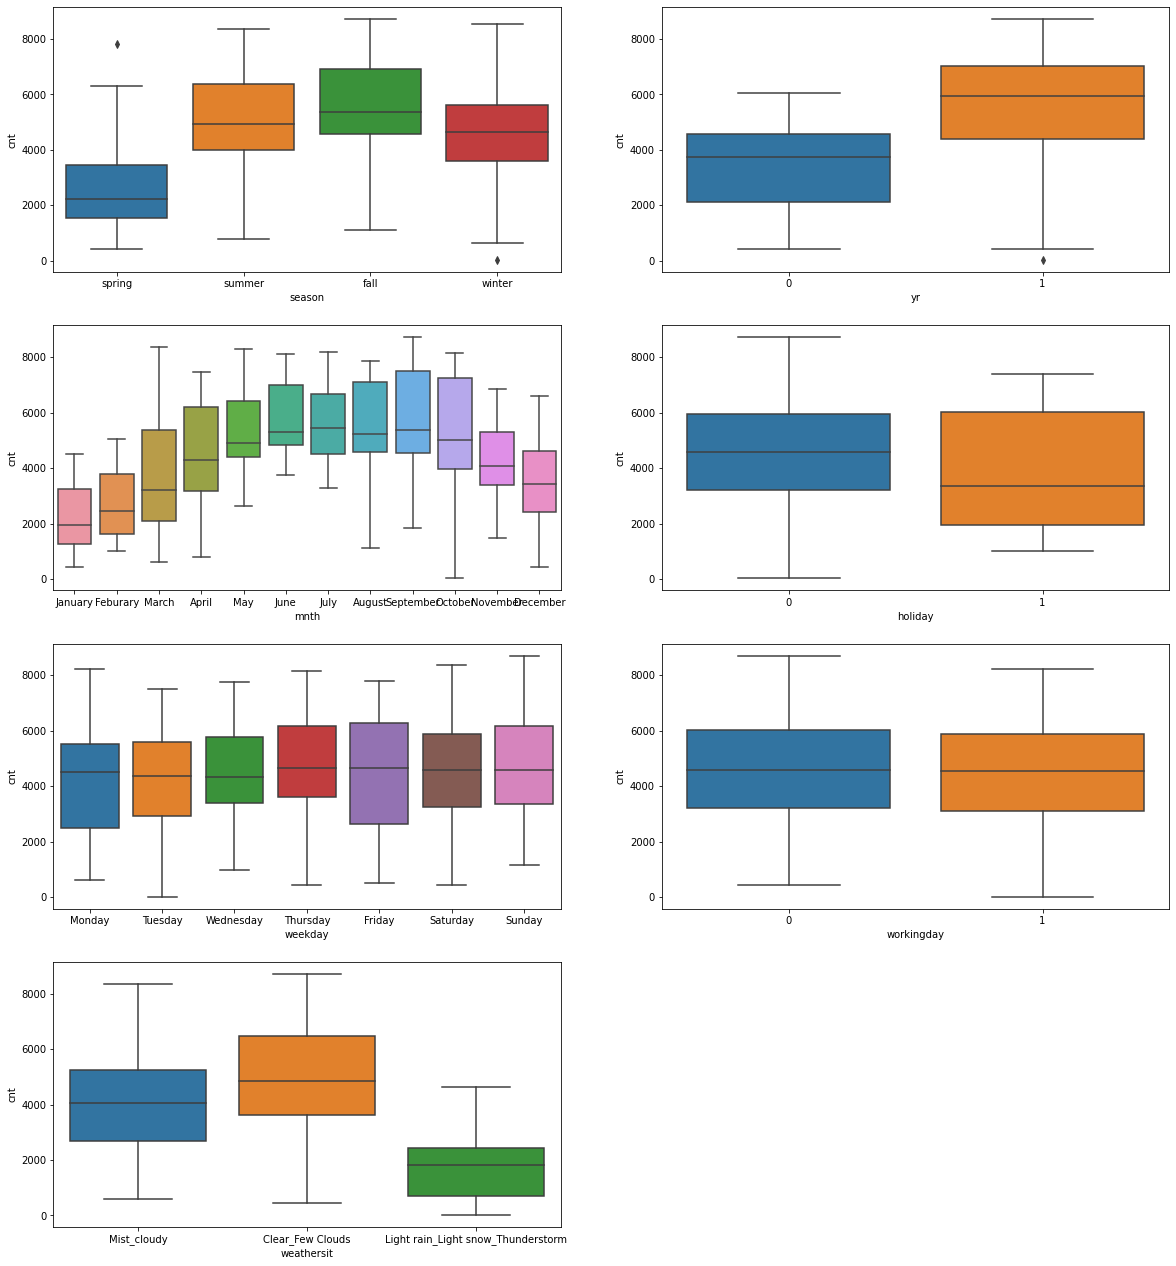

In [17]:
plt.figure(figsize = (20,40))
i = 1
for col in cat_cols:
    plt.subplot(7,2,i)
    sns.boxplot(x = col ,y="cnt", data = df1)
    i += 1
plt.show()

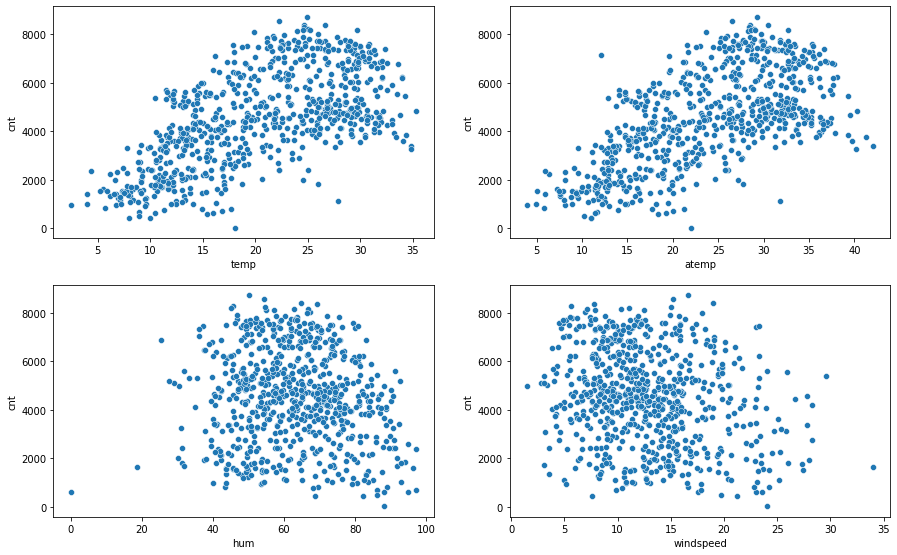

In [18]:
plt.figure(figsize = (15,35))
i = 1
for col in cont_cols:
    plt.subplot(7,2,i)
    sns.scatterplot(x = col ,y="cnt", data = df1)
    i += 1
plt.show()

## Multrivate Analysis

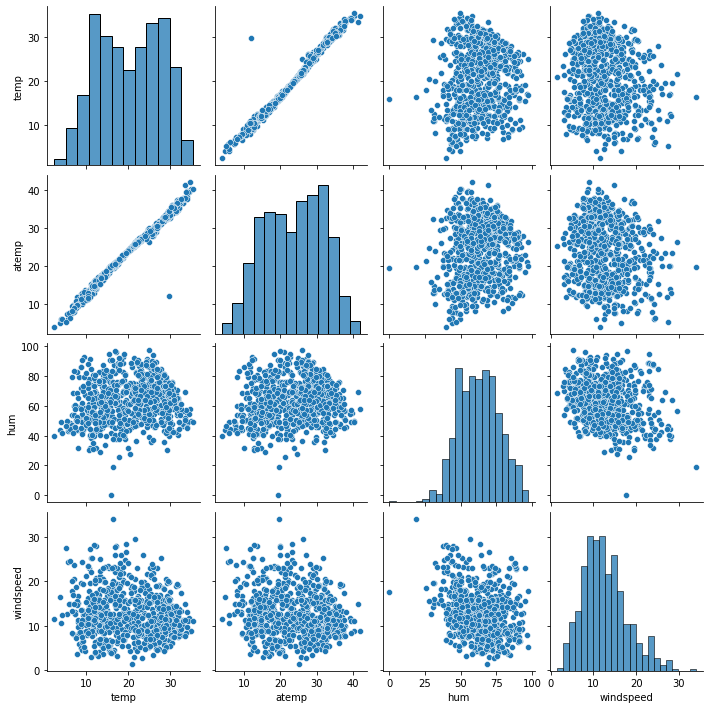

In [19]:
sns.pairplot(df1[cont_cols])
plt.show()

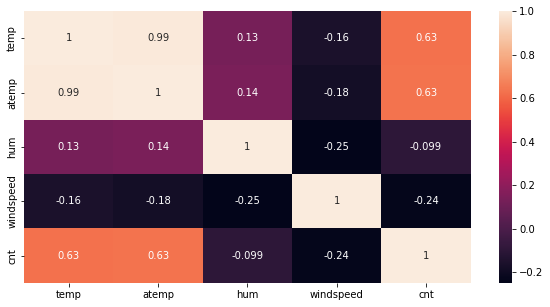

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(df1[cont_cols+["cnt"]].corr(),annot=True)
plt.show()

### Dummy Variable Creation

In [21]:
# Only for non binary categorical columns
df1[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [22]:
#Dummy variables for season, mnth, weekday, weathersit
dum1=pd.get_dummies(df1.season,drop_first=True)
dum2=pd.get_dummies(df1.mnth,drop_first=True)
dum3=pd.get_dummies(df1.weekday,drop_first=True)
dum4=pd.get_dummies(df1.weathersit,drop_first=True)

In [23]:
# Combining the results to dataframe
bike=pd.concat([dum1,dum2,dum3,dum4,df1],axis=1)
bike.head()

,spring,summer,winter,August,December,Feburary,January,July,June,March,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,January,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,January,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,January,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,January,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,January,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
# Drop 'season','mnth','weekday','weathersit' 
bike.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
bike.head()

,spring,summer,winter,August,December,Feburary,January,July,June,March,...,Light rain_Light snow_Thunderstorm,Mist_cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


## Train Test Split

In [25]:
x=bike.drop(["cnt"],axis=1)
y=bike["cnt"]

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [27]:
x_train.shape

(511, 29)

In [28]:
x_test.shape

(219, 29)

## Scaling

In [29]:
#Instantiate an object
scaler = MinMaxScaler()

In [30]:
x_train[cont_cols] = scaler.fit_transform(x_train[cont_cols])
x_train.head()

,spring,summer,winter,August,December,Feburary,January,July,June,March,...,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed
653,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794
576,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475


In [31]:
x_test[cont_cols] = scaler.fit_transform(x_test[cont_cols])

## Modelling

### Feature Selection - Recursive Feature Eimination

In [32]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)

selector=selector.fit(x_train,y_train)
selected_features=list(x_train.columns[selector.support_])
selected_features

['spring',
 'summer',
 'winter',
 'December',
 'January',
 'July',
 'November',
 'September',
 'Light rain_Light snow_Thunderstorm',
 'Mist_cloudy',
 'yr',
 'holiday',
 'temp',
 'hum',
 'windspeed']

In [33]:
x_train=x_train[selected_features]
x_test=x_test[selected_features]

In [34]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [35]:
model1=sm.OLS(y_train,x_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     180.1
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          2.29e-189
Time:                        21:20:17   Log-Likelihood:                -4120.0
No. Observations:                 511   AIC:                             8272.
Df Residuals:                     495   BIC:                             8340.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               2809.0469    313.778      8.952      0.000    2192.546    3425.548
spring                              -534.0919    184.906     -2.888      0.004    -897.389    -170.795
summer                               365.5827    133.337      2.742      0.006     103.606     627.559
winter                               901.2578    156.273      5.767      0.000     594.218    1208.298
December                            -321.7058    151.999     -2.117      0.035    -620.348     -23.064
January                             -379.9440    157.756     -2.408      0.016    -689.898     -69.990
July                                -482.0634    158.609     -3.039      0.002    -793.694    -170.433
November                            -354.9171    163.025     -2.177      0.030    -675.224     -34.610
September                            651.4485    146.931      4.434      0.000     362.762     940.134
Light rain_Light snow_Thunderstorm -2148.1723    229.722     -9.351      0.000   -2599.522   -1696.823
Mist_cloudy                         -474.7881     90.897     -5.223      0.000    -653.380    -296.196
yr                                  2006.3312     70.290     28.543      0.000    1868.227    2144.435
holiday                             -792.5658    222.754     -3.558      0.000   -1230.225    -354.906
temp                                4180.0645    321.999     12.982      0.000    3547.412    4812.718
hum                                -1415.4079    328.746     -4.305      0.000   -2061.317    -769.498
windspeed                          -1641.1944    224.403     -7.314      0.000   -2082.094   -1200.295
==============================================================================
Omnibus:                       67.308   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.984
Skew:                          -0.686   Prob(JB):                     4.06e-36
Kurtosis:                       5.402   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Variance Inflation Factor

In [36]:
# Generic function to calculate VIF of variables

def cal_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [37]:
cal_VIF(x_train)

,Features,VIF
13,hum,30.93
12,temp,17.82
14,windspeed,4.73
0,spring,4.37
2,winter,4.06
1,summer,2.82
9,Mist_cloudy,2.32
10,yr,2.09
6,November,1.83
4,January,1.75


In [38]:
x_train=x_train.drop(["hum"],axis=1)
x_test=x_test.drop(["hum"],axis=1)

In [39]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [40]:
model2=sm.OLS(y_train,x_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.1
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          1.41e-186
Time:                        21:20:17   Log-Likelihood:                -4129.4
No. Observations:                 511   AIC:                             8289.
Df Residuals:                     496   BIC:                             8352.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               2158.0410    279.762      7.714      0.000    1608.376    2707.706
spring                              -621.4538    187.010     -3.323      0.001    -988.884    -254.024
summer                               300.4926    134.799      2.229      0.026      35.646     565.340
winter                               770.6852    155.989      4.941      0.000     464.205    1077.165
December                            -386.3915    153.905     -2.511      0.012    -688.778     -84.005
January                             -437.6255    159.941     -2.736      0.006    -751.871    -123.380
July                                -436.7242    161.033     -2.712      0.007    -753.115    -120.333
November                            -362.7989    165.872     -2.187      0.029    -688.697     -36.900
September                            592.4547    148.855      3.980      0.000     299.991     884.918
Light rain_Light snow_Thunderstorm -2543.4806    214.266    -11.871      0.000   -2964.461   -2122.500
Mist_cloudy                         -699.8303     75.669     -9.249      0.000    -848.502    -551.158
yr                                  2041.8420     71.028     28.747      0.000    1902.289    2181.395
holiday                             -798.5984    226.653     -3.523      0.000   -1243.917    -353.280
temp                                3806.4407    315.519     12.064      0.000    3186.522    4426.360
windspeed                          -1377.2865    219.652     -6.270      0.000   -1808.850    -945.723
==============================================================================
Omnibus:                       69.938   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.772
Skew:                          -0.703   Prob(JB):                     1.84e-38
Kurtosis:                       5.487   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
cal_VIF(x_train)

,Features,VIF
12,temp,5.18
13,windspeed,4.67
2,winter,2.94
0,spring,2.89
1,summer,2.24
10,yr,2.08
6,November,1.80
4,January,1.66
5,July,1.59
9,Mist_cloudy,1.56


In [42]:
x_train=x_train.drop(["temp"],axis=1)
x_test=x_test.drop(["temp"],axis=1)

In [43]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [44]:
model3=sm.OLS(y_train,x_train_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          4.19e-160
Time:                        21:20:17   Log-Likelihood:                -4195.1
No. Observations:                 511   AIC:                             8418.
Df Residuals:                     497   BIC:                             8478.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               5197.6761    138.143     37.625      0.000    4926.259    5469.093
spring                             -2175.2883    154.046    -14.121      0.000   -2477.950   -1872.627
summer                              -433.1663    136.680     -3.169      0.002    -701.708    -164.625
winter                              -185.7632    152.629     -1.217      0.224    -485.641     114.114
December                            -955.5264    166.441     -5.741      0.000   -1282.542    -628.511
January                            -1046.0236    172.447     -6.066      0.000   -1384.838    -707.209
July                                -160.2718    181.095     -0.885      0.377    -516.078     195.534
November                            -880.1752    182.047     -4.835      0.000   -1237.852    -522.498
September                            459.9114    168.660      2.727      0.007     128.538     791.285
Light rain_Light snow_Thunderstorm -2715.5111    242.897    -11.180      0.000   -3192.743   -2238.279
Mist_cloudy                         -758.6555     85.793     -8.843      0.000    -927.217    -590.094
yr                                  2139.0446     80.177     26.679      0.000    1981.516    2296.573
holiday                             -744.0603    257.460     -2.890      0.004   -1249.904    -238.217
windspeed                          -1652.8818    248.204     -6.659      0.000   -2140.539   -1165.224
==============================================================================
Omnibus:                       57.096   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.722
Skew:                          -0.594   Prob(JB):                     5.57e-30
Kurtosis:                       5.217   Cond. No.                         9.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
x_train=x_train.drop(["July"],axis=1)
x_test=x_test.drop(["July"],axis=1)

In [46]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [47]:
model4=sm.OLS(y_train,x_train_sm)
res4=model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     157.9
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          4.81e-161
Time:                        21:20:18   Log-Likelihood:                -4195.5
No. Observations:                 511   AIC:                             8417.
Df Residuals:                     498   BIC:                             8472.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               5137.8495    120.447     42.656      0.000    4901.202    5374.497
spring                             -2118.7879    140.164    -15.116      0.000   -2394.173   -1843.402
summer                              -376.1746    120.533     -3.121      0.002    -612.990    -139.359
winter                              -135.3861    141.586     -0.956      0.339    -413.566     142.794
December                            -950.6140    166.312     -5.716      0.000   -1277.375    -623.853
January                            -1045.9286    172.409     -6.067      0.000   -1384.668    -707.189
November                            -873.3687    181.845     -4.803      0.000   -1230.647    -516.091
September                            505.7075    160.490      3.151      0.002     190.386     821.029
Light rain_Light snow_Thunderstorm -2716.4291    242.842    -11.186      0.000   -3193.551   -2239.307
Mist_cloudy                         -753.3346     85.563     -8.804      0.000    -921.444    -585.225
yr                                  2139.7879     80.156     26.695      0.000    1982.303    2297.273
holiday                             -741.2217    257.384     -2.880      0.004   -1246.914    -235.530
windspeed                          -1651.7205    248.146     -6.656      0.000   -2139.263   -1164.178
==============================================================================
Omnibus:                       57.237   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.949
Skew:                          -0.598   Prob(JB):                     8.19e-30
Kurtosis:                       5.205   Cond. No.                         8.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
x_train=x_train.drop(["winter"],axis=1)
x_test=x_test.drop(["winter"],axis=1)

In [49]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [50]:
model5=sm.OLS(y_train,x_train_sm)
res5=model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     172.2
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          5.64e-162
Time:                        21:20:18   Log-Likelihood:                -4196.0
No. Observations:                 511   AIC:                             8416.
Df Residuals:                     499   BIC:                             8467.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               5096.9903    112.603     45.265      0.000    4875.755    5318.225
spring                             -2061.5829    126.744    -16.266      0.000   -2310.601   -1812.564
summer                              -330.0192    110.436     -2.988      0.003    -546.997    -113.042
December                           -1016.4815    151.363     -6.716      0.000   -1313.870    -719.093
January                            -1057.1445    171.995     -6.146      0.000   -1395.068    -719.221
November                            -962.2322    156.291     -6.157      0.000   -1269.301    -655.163
September                            522.5974    159.502      3.276      0.001     209.220     835.975
Light rain_Light snow_Thunderstorm -2744.7562    241.008    -11.389      0.000   -3218.271   -2271.241
Mist_cloudy                         -760.0172     85.270     -8.913      0.000    -927.550    -592.485
yr                                  2140.4925     80.145     26.708      0.000    1983.029    2297.956
holiday                             -742.6829    257.357     -2.886      0.004   -1248.320    -237.046
windspeed                          -1659.2387    248.000     -6.690      0.000   -2146.492   -1171.985
==============================================================================
Omnibus:                       60.724   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.637
Skew:                          -0.623   Prob(JB):                     1.44e-32
Kurtosis:                       5.310   Cond. No.                         8.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
cal_VIF(x_train)

,Features,VIF
10,windspeed,3.23
0,spring,2.36
8,yr,1.74
1,summer,1.70
3,January,1.62
7,Mist_cloudy,1.48
4,November,1.23
5,September,1.16
2,December,1.13
6,Light rain_Light snow_Thunderstorm,1.06


In [52]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [53]:
model6=sm.OLS(y_train,x_train_sm)
res6=model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     172.2
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          5.64e-162
Time:                        21:20:18   Log-Likelihood:                -4196.0
No. Observations:                 511   AIC:                             8416.
Df Residuals:                     499   BIC:                             8467.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               5096.9903    112.603     45.265      0.000    4875.755    5318.225
spring                             -2061.5829    126.744    -16.266      0.000   -2310.601   -1812.564
summer                              -330.0192    110.436     -2.988      0.003    -546.997    -113.042
December                           -1016.4815    151.363     -6.716      0.000   -1313.870    -719.093
January                            -1057.1445    171.995     -6.146      0.000   -1395.068    -719.221
November                            -962.2322    156.291     -6.157      0.000   -1269.301    -655.163
September                            522.5974    159.502      3.276      0.001     209.220     835.975
Light rain_Light snow_Thunderstorm -2744.7562    241.008    -11.389      0.000   -3218.271   -2271.241
Mist_cloudy                         -760.0172     85.270     -8.913      0.000    -927.550    -592.485
yr                                  2140.4925     80.145     26.708      0.000    1983.029    2297.956
holiday                             -742.6829    257.357     -2.886      0.004   -1248.320    -237.046
windspeed                          -1659.2387    248.000     -6.690      0.000   -2146.492   -1171.985
==============================================================================
Omnibus:                       60.724   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.637
Skew:                          -0.623   Prob(JB):                     1.44e-32
Kurtosis:                       5.310   Cond. No.                         8.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model is ready

In [54]:
# Calculating R^2 value in terms of percent for the train dataset

predicted_value1=res6.predict(x_train_sm)
print("Train Performance:",round(r2_score(y_train, predicted_value1)*100,2),"%")

Train Performance: 79.15 %


In [55]:
# Calculating R^2 value in terms of percent for the test dataset

predicted_value2=res6.predict(x_test_sm)
print("Test Performance:",round(r2_score(y_test, predicted_value2)*100,2),"%")

Test Performance: 75.35 %


In [56]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2_score(y_test, predicted_value2))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
print(adjusted_r2)

0.7405


## Comparision between Training and Testing dataset:

- Train dataset R^2          : 0.792
- Test dataset R^2           : 0.753
- Train dataset Adjusted R^2 : 0.787   
- Test dataset Adjusted R^2  : 0.740

## Model Evaluation

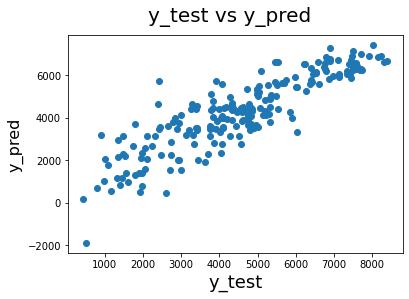

In [57]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,predicted_value2)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

## We have a model that appears accurate enough to forecast bike demand. The fact that the "cnt" or expected demand greatly overlapped the actual and predicted demand shows how well the model can account for the change in demand.

## Residual Analysis of the train data

In [58]:
x_t=x_train.iloc[:,0].values

In [59]:
#CALCULATING RESIDUALS

res=y_train - predicted_value1

Text(0.5, 0, 'Errors')

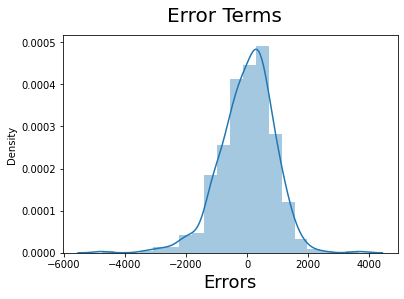

In [60]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

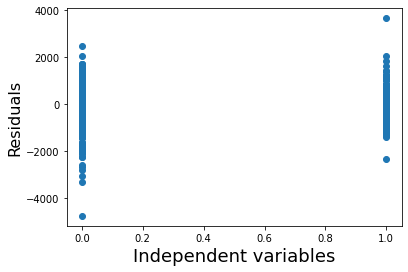

In [61]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(x_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

## Regression is likely to experience autocorrelation when we have time series data (such as annual data), as demand for the following year will undoubtedly depend on demand for the current year. Error terms in several observations will therefore undoubtedly be associated with one another.


In [62]:
x_train.head()

,spring,summer,December,January,November,September,Light rain_Light snow_Thunderstorm,Mist_cloudy,yr,holiday,windspeed
653,0,0,0,0,0,0,0,0,1,0,0.300794
576,0,0,0,0,0,0,0,0,1,0,0.264686
426,1,0,0,0,0,0,0,1,1,0,0.255342
728,1,0,1,0,0,0,0,0,1,0,0.663106
482,0,1,0,0,0,0,0,1,1,0,0.188475


In [63]:
print(res6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     172.2
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          5.64e-162
Time:                        21:20:18   Log-Likelihood:                -4196.0
No. Observations:                 511   AIC:                             8416.
Df Residuals:                     499   BIC:                             8467.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [64]:
round(res6.params,4)

const                                 5096.9903
spring                               -2061.5829
summer                                -330.0192
December                             -1016.4815
January                              -1057.1445
November                              -962.2322
September                              522.5974
Light rain_Light snow_Thunderstorm   -2744.7562
Mist_cloudy                           -760.0172
yr                                    2140.4925
holiday                               -742.6829
windspeed                            -1659.2387
dtype: float64

## We can see that the equation for best fitted line is:

### cnt = 5096.9903-2061.5829 X spring-330.0192 X summer-1016.4815 X December-1057.1445 X January-  962.2322 X November+522.5974 X September-2744.7562 X Light rain_Light snow_Thunderstorm-760.0172 X Mist_cloudy+2140.4925 X yr-742.6829 X holiday-1659.2387 X windspeed

## We can see the demand for bikes depends mainly on below variables:
### spring , summer , December , January , November , September , Light rain_Light snow_Thunderstorm , Mist_cloudy , yr , holiday , windspeed

### Demand decreases in spring and summer season and in the month of December , January , November and during Light rain_Light snow_Thunderstorm and in  Mist_cloudy and when windspeed is high.

### Demand increase in month of September and depends on yr(year).